## Import modules


In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from google.colab import files
from scipy import stats
%matplotlib inline
warnings.filterwarnings('ignore')

##Loading the dataset


In [180]:
file = files.upload()

In [181]:
df = pd.read_csv('winequalityN.csv')

##Preprocessing the dataset

In [182]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [183]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [185]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [186]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [187]:
#fill the missing value with avarage
for col, value in df.items():
  if col !='type':
    df[col]=df[col].fillna(df[col].mean())

In [188]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [189]:
for col, value in df.items():
  if col !='type':
    df[col] = pd.to_numeric(df[col],errors='coerce')

In [190]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

##Exploratory Data Analysis

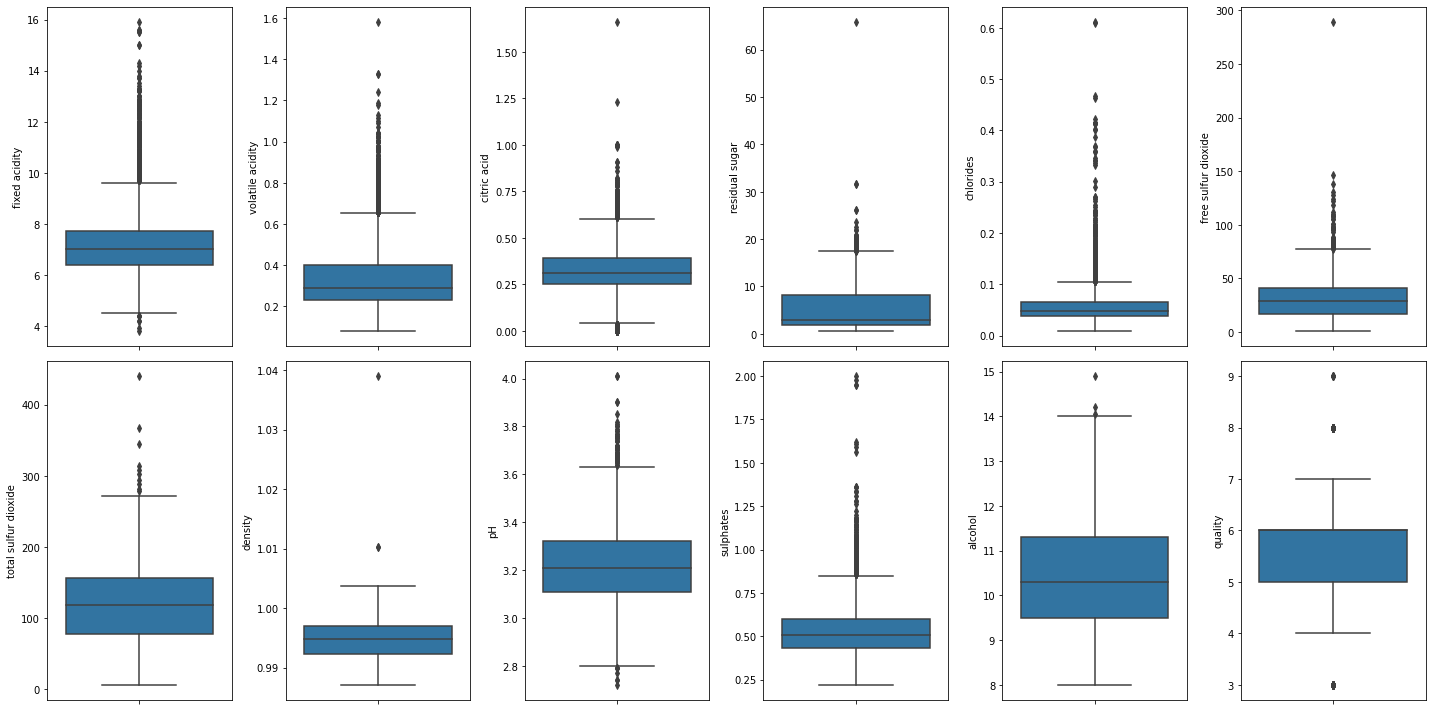

In [191]:
#create box plot
fig, ax = plt.subplots(ncols=6,nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
  if col !='type':
    sns.boxplot(y=col,data=df,ax=ax[index])
    index += 1
plt.tight_layout()

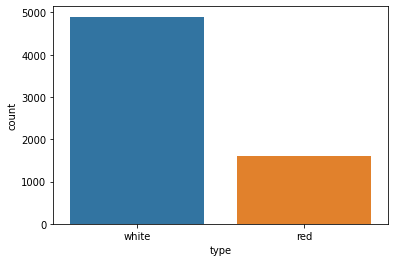

In [192]:
sns.countplot(df['type'])

In [193]:
#Remove outliers
df = df.drop('type',axis=1)

In [194]:
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

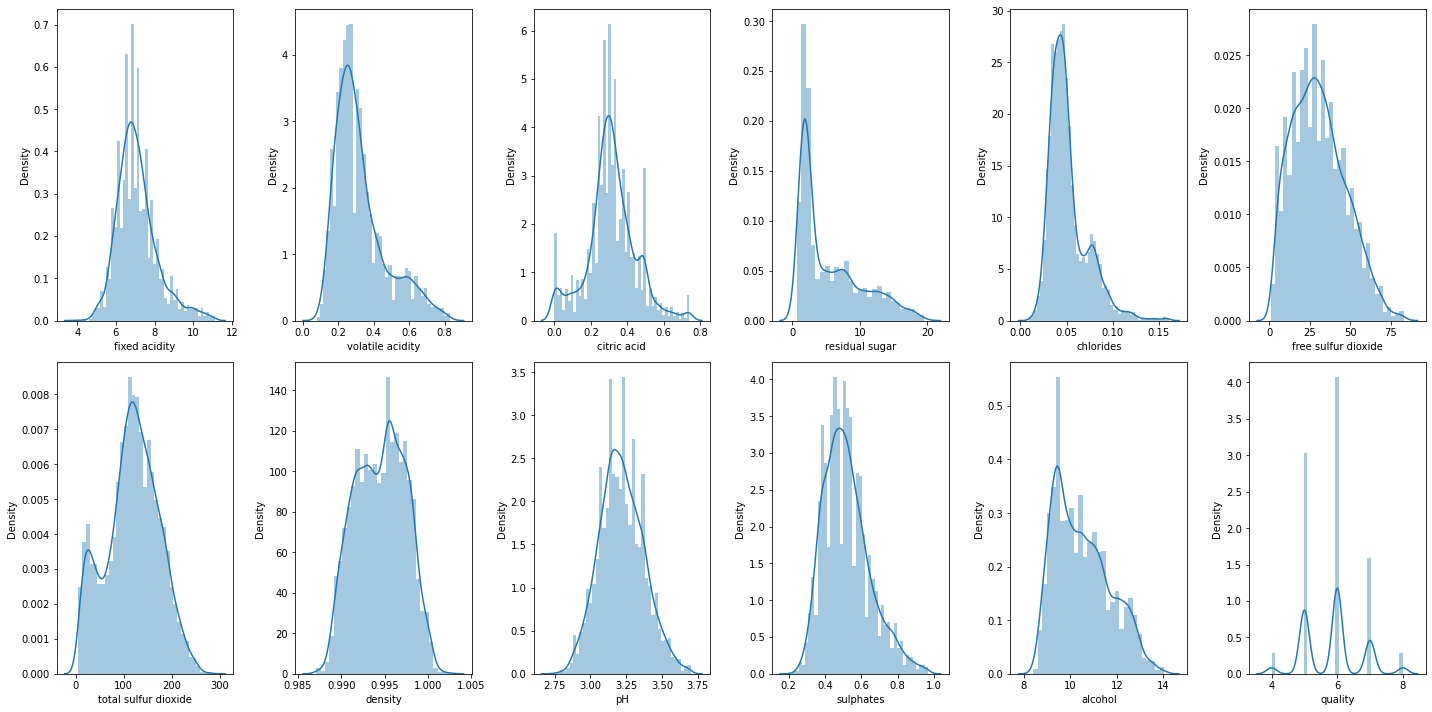

In [195]:
#create dist plot
fig,ax = plt.subplots(ncols=6,nrows=2,figsize=(20,10))
index = 0
ax = ax.flatten()
for col,value in df.items():
  sns.distplot(value,ax = ax[index])
  index +=1
plt.tight_layout()

In [196]:
#log transformation
df['free sulfer dioxide'] = np.log(1+df['free sulfur dioxide'])

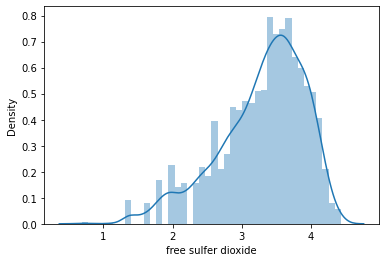

In [197]:
sns.distplot(df['free sulfer dioxide'])

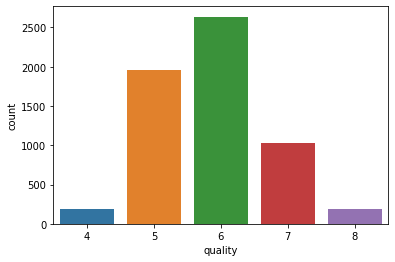

In [199]:
sns.countplot(df['quality'])

### Coorelation matrix

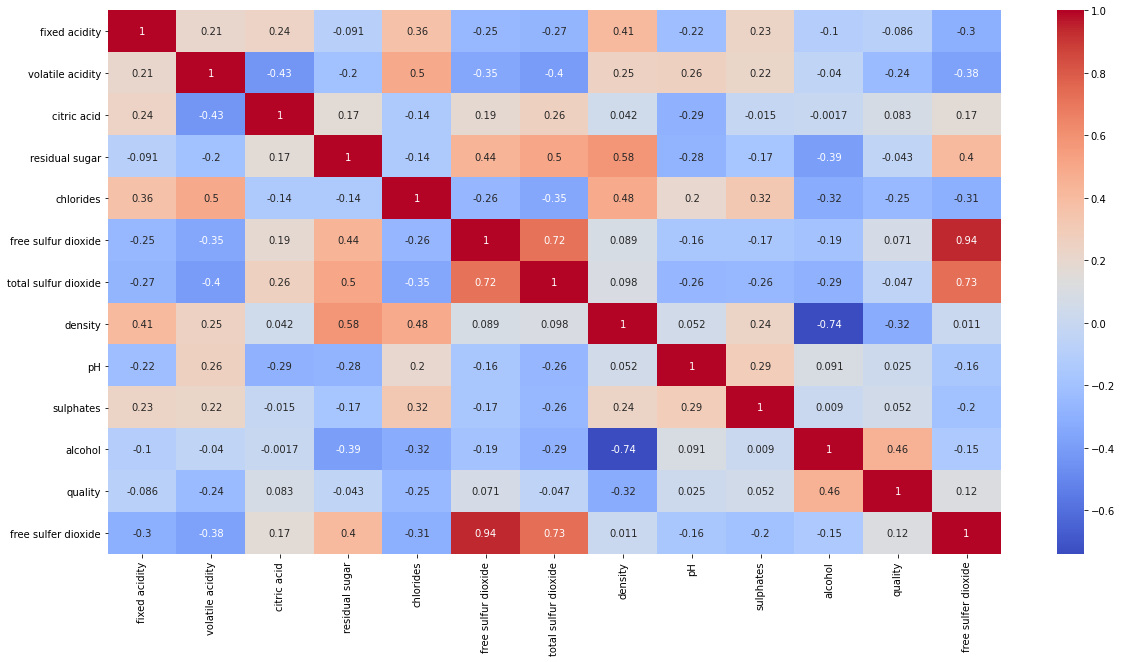

In [201]:
corr = df.corr()
plt.figure(figsize= (20,10))
sns.heatmap(corr, annot = True, cmap='coolwarm')

### Input Split

In [262]:
X = df.drop(columns=['quality','total sulfur dioxide','density','chlorides'])
y = df['quality']

In [263]:
y.value_counts()

6    2636
5    1958
7    1027
8     184
4     184
Name: quality, dtype: int64

### Class Imbalancement

In [264]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
X,y = oversample.fit_resample(X,y)

### Model Training

In [265]:
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model,X,y):
  x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  model.fit(x_train,y_train)
  print('Accuracy:',model.score(x_test,y_test)*100)
  score = cross_val_score(model,X,y,cv=5)
  print('cv Score:',np.mean(score)*100)


### Implement the different models

In [266]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,X,y)

Accuracy: 38.664643399089535
cv Score: 36.487101669195745


In [267]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,X,y)

Accuracy: 73.5660091047041
cv Score: 67.50379362670714


In [268]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model,X,y)

Accuracy: 84.30955993930198
cv Score: 76.81335356600911


In [269]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model,X,y)

Accuracy: 85.15933232169954
cv Score: 78.55083459787558


In [270]:
import lightgbm
model = lightgbm.LGBMClassifier()
classify(model,X,y)

Accuracy: 78.57359635811835
cv Score: 70.39453717754172
